# Week 13
# Data Wrangling: Join, Combine, and Reshape

In many applications, data may be spread across a number of files or be arranged in a form that is not easy to analyze. This chapter focuses on tools to help combine, join, and rearrange data.

*Reference*: Textbook, Chapter 8

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## I. Merging Datasets

### 1. Default merge operation for data frames

In [2]:
# Generate two data frames
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [3]:
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})
df2

,key,data2
0,a,0
1,b,1
2,d,2


`df1.merge(df2)` merges df1 with df2:

In [4]:
df1.merge(df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [5]:
# It is the same as df2.merge(df1)
df2.merge(df1)

,key,data2,data1
0,a,0,2
1,a,0,4
2,a,0,5
3,b,1,0
4,b,1,1
5,b,1,6


In [6]:
pd.merge(df2, df1)

,key,data2,data1
0,a,0,2
1,a,0,4
2,a,0,5
3,b,1,0
4,b,1,1
5,b,1,6


Q: Can you identify the rule followed by merge?

- **How does Python know which row from df2 should be combined with a row from df1?**
A row from df2 can be merged with a row from df1 if and only if they are the same value in the shared column.

- **Which column is used to "glue" df1 and df2?**
The glue column is the column(s) that appear in both data frames.

- **Can a row from df1 disappear in the merged data frame?**
A row can indeed disappear if it cannot find a match from df2.

- **Can a row from df2 disappear in the merged data frame?**
A row can indeed disappear if it cannot find a match from df1.

- **Can a row from df1/df2 appear multiple times in the merged data frame?**
Yes. A row may appear multiple times if there are multiple matches from the other data frame.

In [7]:
df3 = pd.DataFrame({'key': ['a', 'b', 'b'],
                    'data2': range(3)})
df3

,key,data2
0,a,0
1,b,1
2,b,2


In [8]:
# Can you predict the resulting data frame?
df1.merge(df3)

,key,data1,data2
0,b,0,1
1,b,0,2
2,b,1,1
3,b,1,2
4,b,6,1
5,b,6,2
6,a,2,0
7,a,4,0
8,a,5,0


**It is a good practice to specify explicitly which column(s) to join on.**

In [9]:
pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [10]:
df1.merge(df3, on='key')

,key,data1,data2
0,b,0,1
1,b,0,2
2,b,1,1
3,b,1,2
4,b,6,1
5,b,6,2
6,a,2,0
7,a,4,0
8,a,5,0


### 2. What if the column to join has different names in the two data frames?

In [11]:
homework = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Clare'],
    'Hw1': [100, 90, 80],
    'Hw2': [60, 70, 80]
})
homework

,Name,Hw1,Hw2
0,Alice,100,60
1,Bob,90,70
2,Clare,80,80


In [12]:
exam = pd.DataFrame({
    "Full Name": ['Alice', 'Bob', 'Clare'],
    "Midterm": [70, 80, 90],
    "Final": [85, 65, 75]
})
exam

,Full Name,Midterm,Final
0,Alice,70,85
1,Bob,80,65
2,Clare,90,75


In [13]:
pd.merge(homework, exam)

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [14]:
pd.merge(homework, exam, left_on="Name", right_on="Full Name")

,Name,Hw1,Hw2,Full Name,Midterm,Final
0,Alice,100,60,Alice,70,85
1,Bob,90,70,Bob,80,65
2,Clare,80,80,Clare,90,75


In [15]:
homework.merge(exam, left_on="Name", right_on="Full Name")

,Name,Hw1,Hw2,Full Name,Midterm,Final
0,Alice,100,60,Alice,70,85
1,Bob,90,70,Bob,80,65
2,Clare,80,80,Clare,90,75


In [16]:
exam.merge(homework, left_on="Full Name", right_on="Name")

,Full Name,Midterm,Final,Name,Hw1,Hw2
0,Alice,70,85,Alice,100,60
1,Bob,80,65,Bob,90,70
2,Clare,90,75,Clare,80,80


### 3. What if the column to join has different values?

In [17]:
homework = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Clare', 'David'],
    'Hw1': [100, 90, 80, 70],
    'Hw2': [60, 70, 80, 90]
})
homework

,Name,Hw1,Hw2
0,Alice,100,60
1,Bob,90,70
2,Clare,80,80
3,David,70,90


In [18]:
exam = pd.DataFrame({
    "Full Name": ['Alice', 'Bob', 'Clare', 'Eli'],
    "Midterm": [70, 80, 90, 100],
    "Final": [85, 65, 75, 55]
})
exam

,Full Name,Midterm,Final
0,Alice,70,85
1,Bob,80,65
2,Clare,90,75
3,Eli,100,55


In [19]:
# Default merge will drop values that cannot find a match
pd.merge(homework, exam,
         left_on="Name",
         right_on="Full Name")

,Name,Hw1,Hw2,Full Name,Midterm,Final
0,Alice,100,60,Alice,70,85
1,Bob,90,70,Bob,80,65
2,Clare,80,80,Clare,90,75


Different join types with `how` argument
- inner: Use only the keys combinations observed in both tables
- outer: Use all possible keys combinations
- left: Use all keys found in the first data frame
- right: Use all keys found in the second data frame

In [20]:
pd.merge(homework, exam, left_on="Name", right_on="Full Name",
         how='outer')

,Name,Hw1,Hw2,Full Name,Midterm,Final
0,Alice,100.0,60.0,Alice,70.0,85.0
1,Bob,90.0,70.0,Bob,80.0,65.0
2,Clare,80.0,80.0,Clare,90.0,75.0
3,David,70.0,90.0,NaN,NaN,NaN
4,NaN,NaN,NaN,Eli,100.0,55.0


In [21]:
pd.merge(homework, exam,
         left_on="Name",
         right_on="Full Name",
         how="left")

,Name,Hw1,Hw2,Full Name,Midterm,Final
0,Alice,100,60,Alice,70.0,85.0
1,Bob,90,70,Bob,80.0,65.0
2,Clare,80,80,Clare,90.0,75.0
3,David,70,90,NaN,NaN,NaN


In [22]:
pd.merge(homework, exam,
         left_on="Name",
         right_on="Full Name",
         how="right")

,Name,Hw1,Hw2,Full Name,Midterm,Final
0,Alice,100.0,60.0,Alice,70,85
1,Bob,90.0,70.0,Bob,80,65
2,Clare,80.0,80.0,Clare,90,75
3,NaN,NaN,NaN,Eli,100,55


### 4. What if we want to join on multiple columns?

In [23]:
homework = pd.DataFrame({
    'Semester': ['Fall 2018', 'Fall 2018', 'Fall 2019', 'Fall 2019'],
    'Name': ['Alice', 'Bob', 'Clare', 'Alice'],
    'Hw1': [50, 90, 80, 70],
    'Hw2': [60, 70, 80, 90]
})
homework

,Semester,Name,Hw1,Hw2
0,Fall 2018,Alice,50,60
1,Fall 2018,Bob,90,70
2,Fall 2019,Clare,80,80
3,Fall 2019,Alice,70,90


In [24]:
exam = pd.DataFrame({
    'When': ['Fall 2018', 'Fall 2018', 'Fall 2019', 'Fall 2019'],
    "Name": ['Alice', 'Bob', 'Clare', 'Alice'],
    "Midterm": [60, 80, 90, 100],
    "Final": [45, 65, 75, 55]
})
exam

,When,Name,Midterm,Final
0,Fall 2018,Alice,60,45
1,Fall 2018,Bob,80,65
2,Fall 2019,Clare,90,75
3,Fall 2019,Alice,100,55


In [25]:
pd.merge(homework, exam, on='Name') # Generates two unmatched rows

,Semester,Name,Hw1,Hw2,When,Midterm,Final
0,Fall 2018,Alice,50,60,Fall 2018,60,45
1,Fall 2018,Alice,50,60,Fall 2019,100,55
2,Fall 2019,Alice,70,90,Fall 2018,60,45
3,Fall 2019,Alice,70,90,Fall 2019,100,55
4,Fall 2018,Bob,90,70,Fall 2018,80,65
5,Fall 2019,Clare,80,80,Fall 2019,90,75


In [28]:
pd.merge(homework, exam, left_on=['Semester', 'Name'],
         right_on=['When', 'Name']) # order matters
#          right_on=["Name", "When"])

,Semester,Name,Hw1,Hw2,When,Midterm,Final
0,Fall 2018,Alice,50,60,Fall 2018,60,45
1,Fall 2018,Bob,90,70,Fall 2018,80,65
2,Fall 2019,Clare,80,80,Fall 2019,90,75
3,Fall 2019,Alice,70,90,Fall 2019,100,55


If both columns have the same name in the two data frames, we can use the parameter `on` instead of `left_on` and `right_on`.

In [31]:
exam2 = exam.copy()
# exam2.columns = ['Final', 'Midterm', 'Name', 'Semester']
exam2.columns = ["Semester", "Name", "Midterm", "Final"]
exam2

,Semester,Name,Midterm,Final
0,Fall 2018,Alice,60,45
1,Fall 2018,Bob,80,65
2,Fall 2019,Clare,90,75
3,Fall 2019,Alice,100,55


In [32]:
pd.merge(homework, exam2, on=['Semester', 'Name'])

,Semester,Name,Hw1,Hw2,Midterm,Final
0,Fall 2018,Alice,50,60,60,45
1,Fall 2018,Bob,90,70,80,65
2,Fall 2019,Clare,80,80,90,75
3,Fall 2019,Alice,70,90,100,55


### 5. What if there are overlapping columns?

In [33]:
homework = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Clare', 'David'],
    'Hw1': [100, 90, 80, 70],
    'Hw2': [60, 70, 80, 90],
    'Average': [80, 80, 80, 80]
})
homework

,Name,Hw1,Hw2,Average
0,Alice,100,60,80
1,Bob,90,70,80
2,Clare,80,80,80
3,David,70,90,80


In [34]:
exam = pd.DataFrame({
    "Name": ['Alice', 'Bob', 'Clare', 'Eva'],
    "Midterm": [60, 80, 90, 100],
    "Final": [45, 65, 75, 55],
    "Average": [52.5, 72.5, 82.5, 77.5]
})
exam

,Name,Midterm,Final,Average
0,Alice,60,45,52.5
1,Bob,80,65,72.5
2,Clare,90,75,82.5
3,Eva,100,55,77.5


In [35]:
pd.merge(homework, exam) # Wrong approach!

C:\Users\ch002\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1219: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  warnings.warn(


,Name,Hw1,Hw2,Average,Midterm,Final


In [36]:
pd.merge(homework, exam, on='Name', how='outer')

,Name,Hw1,Hw2,Average_x,Midterm,Final,Average_y
0,Alice,100.0,60.0,80.0,60.0,45.0,52.5
1,Bob,90.0,70.0,80.0,80.0,65.0,72.5
2,Clare,80.0,80.0,80.0,90.0,75.0,82.5
3,David,70.0,90.0,80.0,NaN,NaN,NaN
4,Eva,NaN,NaN,NaN,100.0,55.0,77.5


In [37]:
pd.merge(homework, exam, on='Name', suffixes=('_hw', '_ex'), how='outer')

,Name,Hw1,Hw2,Average_hw,Midterm,Final,Average_ex
0,Alice,100.0,60.0,80.0,60.0,45.0,52.5
1,Bob,90.0,70.0,80.0,80.0,65.0,72.5
2,Clare,80.0,80.0,80.0,90.0,75.0,82.5
3,David,70.0,90.0,80.0,NaN,NaN,NaN
4,Eva,NaN,NaN,NaN,100.0,55.0,77.5


### 6. What if we want to merge on index?

In [38]:
homework = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Clare', 'David'],
    'Hw1': [100, 90, 80, 70],
    'Hw2': [60, 70, 80, 90],
    'Average': [80, 80, 80, 80]
}, index=[111, 222, 333, 444])
homework

,Name,Hw1,Hw2,Average
111,Alice,100,60,80
222,Bob,90,70,80
333,Clare,80,80,80
444,David,70,90,80


In [39]:
exam = pd.DataFrame({
    "Name": ['Alice', 'Bob', 'Clare', 'Eva'],
    "Midterm": [60, 80, 90, 100],
    "Final": [45, 65, 75, 55],
    "Average": [52.5, 72.5, 82.5, 77.5]
})
exam = exam.set_index('Name')
exam

,Midterm,Final,Average
Name,,,
Alice,60,45,52.5
Bob,80,65,72.5
Clare,90,75,82.5
Eva,100,55,77.5


In [40]:
pd.merge(homework, exam)

C:\Users\ch002\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1219: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  warnings.warn(


,Name,Hw1,Hw2,Average,Midterm,Final


In [41]:
pd.merge(homework, exam, left_on='Name', right_index=True)

,Name,Hw1,Hw2,Average_x,Midterm,Final,Average_y
111,Alice,100,60,80,60,45,52.5
222,Bob,90,70,80,80,65,72.5
333,Clare,80,80,80,90,75,82.5


## II. Concatenations

### 1. Concatenating NumPy Arrays
My personal favorite methods are np.hstack() for horizontal concatenation and np.vstack() for vertical concatenation.

In [46]:
print(list(range(12)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [47]:
ary = np.arange(12) # the arange() function generate an array of the same values.
print(ary)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [49]:
arr1 = np.arange(12).reshape([3, 4]) # Turn the original array to a 3x4 2D array
print(arr1)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [50]:
arr2 = np.arange(10, 90, 10).reshape([2, 4])
print(arr2)

[[10 20 30 40]
 [50 60 70 80]]


The function `np.vstack()` concatenate two arrays vertically. 

In [51]:
print(np.vstack([arr1, arr2]))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [10 20 30 40]
 [50 60 70 80]]


We can also concatenate arrays horizontally using `np.hstack`.

In [53]:
arr3 = np.arange(100, 10, -10).reshape([3, 3])
print(arr3)

[[100  90  80]
 [ 70  60  50]
 [ 40  30  20]]


In [54]:
print(np.hstack([arr1, arr3]))

[[  0   1   2   3 100  90  80]
 [  4   5   6   7  70  60  50]
 [  8   9  10  11  40  30  20]]


### 2. Concatenating Data Frames

In [55]:
spring_records = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Clare', 'David'],
    'Homework': [60, 70, 80, 90],
    'Exam': [65, 75, 85, 95]
})
spring_records

,Name,Homework,Exam
0,Alice,60,65
1,Bob,70,75
2,Clare,80,85
3,David,90,95


In [56]:
fall_records = pd.DataFrame({
    'Name': ['Alice', 'Eva', 'Fred', 'Gabriel'],
    'Homework': [66, 77, 88, 99],
    'Exam': [69, 79, 89, 99]
})
fall_records

,Name,Homework,Exam
0,Alice,66,69
1,Eva,77,79
2,Fred,88,89
3,Gabriel,99,99


In [57]:
pd.concat([spring_records, fall_records])

,Name,Homework,Exam
0,Alice,60,65
1,Bob,70,75
2,Clare,80,85
3,David,90,95
0,Alice,66,69
1,Eva,77,79
2,Fred,88,89
3,Gabriel,99,99


In [58]:
pd.concat([spring_records, fall_records], axis=1)

,Name,Homework,Exam,Name,Homework,Exam
0,Alice,60,65,Alice,66,69
1,Bob,70,75,Eva,77,79
2,Clare,80,85,Fred,88,89
3,David,90,95,Gabriel,99,99


## Exercise: Merging Data from MovieLens

In [89]:
# Data source:
# https://grouplens.org/datasets/movielens/latest/
import urllib.request
import zipfile

def load_movielens():
    # Step 1: download the file
    url = "https://files.grouplens.org/datasets/movielens/ml-latest-small.zip"
    urllib.request.urlretrieve(url, 'data/temp.zip')
    
    # Step 2: decompress the file
    zip_file = zipfile.ZipFile('data/temp.zip')
    zip_file.extractall('data')
    
    # Step 3: Load the data as data frames
    file_path = 'data/ml-latest-small/'
    links = pd.read_csv(file_path + 'links.csv')
    movies = pd.read_csv(file_path + 'movies.csv')
    ratings = pd.read_csv(file_path + 'ratings.csv')
    tags = pd.read_csv(file_path + 'tags.csv')
    
    # Verify that the data frames are correctly loaded
#     print(links.shape, movies.shape, ratings.shape, tags.shape)
    return links, movies, ratings, tags

In [90]:
links, movies, ratings, tags = load_movielens()

In [91]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [92]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [94]:
# Merge ratings with movies to reveal the title of each movie rating
pd.merge(ratings, movies, on="movieId").head(10)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
5,18,1,3.5,1455209816,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
6,19,1,4.0,965705637,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
7,21,1,3.5,1407618878,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
8,27,1,3.0,962685262,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
9,31,1,5.0,850466616,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [100]:
# Quickly search for the ratings of a particular movie
name = 'Pulp Fiction'
merged_df = pd.merge(movies, ratings, on='movieId')
results = merged_df[merged_df['title'].str.contains(name)]

<AxesSubplot:>

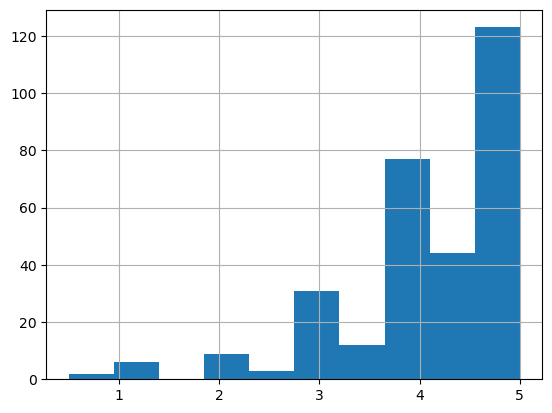

In [105]:
results['rating'].hist()